In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


``` python
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
 ```

In [50]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [51]:
trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform_train)

testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform_test)


print('Training Data- Number of Images : ',len(trainset))
print('\nTest Data- Number of images : ', len(testset))

Files already downloaded and verified
Files already downloaded and verified
Training Data- Number of Images :  50000

Test Data- Number of images :  10000


In [52]:
batch_size = 20
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = True) #for test it can be false too
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(len(classes))

10


In [53]:
it = iter(trainloader)

images, labels = it.next()
print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([20, 3, 224, 224])
torch.Size([3, 224, 224])
9


In [54]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5 #Unnormalizing our normalised data(done in transform earlier)
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()
    
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    


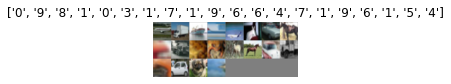

In [55]:
for i in range(1):
    show_batch_images(trainloader)

In [44]:
images = images.numpy() / 2 + 0.5

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.transpose(images[idx],(1,2,0)))
    ax.set_title(classes[labels[idx]])

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

TypeError: Invalid shape (3, 224, 224) for image data

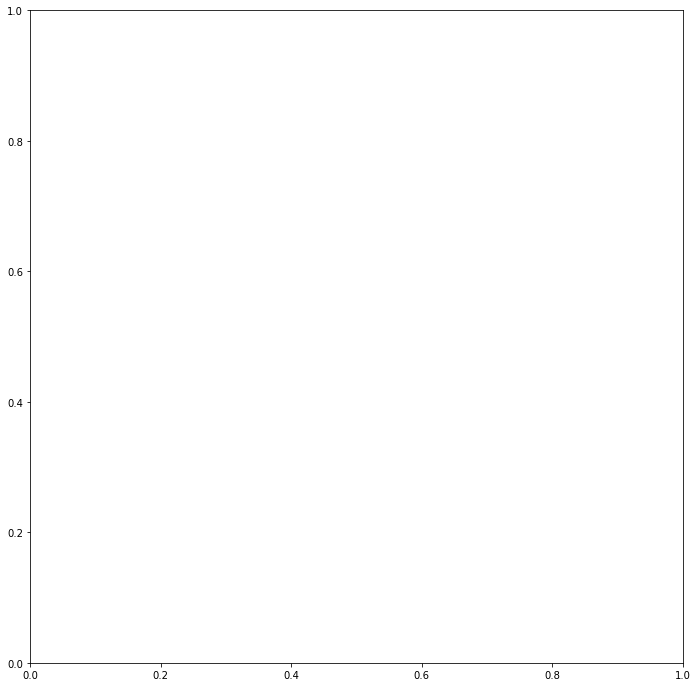

In [41]:
# select an image by index
idx = 3
img = np.squeeze(images[idx])

# display the pixel values in that image
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [18]:
from torchvision import models

In [19]:
vgg = models.vgg16_bn() #11,13,16,19 _bn-batch normalized

In [20]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

### Modifying the VGG
The actual VGG is trained to predict 1000 different classes, instead we are going to use it to predict only 10 different classes for the FashionMNIST dataset

In [21]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [26]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1] 
mod_classifier.extend([nn.Linear(final_in_features, len(classes))]) 
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=10, bias=True)]


In [27]:
vgg.classifier = nn.Sequential(*mod_classifier) # Adding modified classifier part
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

## Accuracy before training

In [56]:
# Calculate accuracy before training
correct = 0
total = 0

# Iterate through test dataset
for images, labels in testloader:

    # forward pass to get outputs
    # the outputs are a series of class scores
    outputs = vgg(images)

    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)

    # count up total number of correct labels
    # for which the predicted and true labels are equal
    total += labels.size(0)
    correct += (predicted == labels).sum()

# calculate the accuracy
# to convert `correct` from a Tensor into a scalar, use .item()
accuracy = 100.0 * correct.item() / total

# print it out!
print('Accuracy before training: ', accuracy)

Accuracy before training:  10.48


In [57]:
torch.cuda.empty_cache()

In [58]:
batch_size = 12

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [59]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [60]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/4167, Loss: 2.43
Iteration: 100/4167, Loss: 2.31
Iteration: 200/4167, Loss: 2.24
Iteration: 300/4167, Loss: 2.34
Iteration: 400/4167, Loss: 2.33
Iteration: 500/4167, Loss: 2.36
Iteration: 600/4167, Loss: 2.26
Iteration: 700/4167, Loss: 2.23
Iteration: 800/4167, Loss: 2.26
Iteration: 900/4167, Loss: 1.95
Iteration: 1000/4167, Loss: 2.12
Iteration: 1100/4167, Loss: 2.27
Iteration: 1200/4167, Loss: 2.35
Iteration: 1300/4167, Loss: 2.06
Iteration: 1400/4167, Loss: 2.34
Iteration: 1500/4167, Loss: 2.20
Iteration: 1600/4167, Loss: 2.22
Iteration: 1700/4167, Loss: 2.76
Iteration: 1800/4167, Loss: 2.28
Iteration: 1900/4167, Loss: 2.08
Iteration: 2000/4167, Loss: 2.17
Iteration: 2100/4167, Loss: 2.19
Iteration: 2200/4167, Loss: 2.15
Iteration: 2300/4167, Loss: 1.82
Iteration: 2400/4167, Loss: 1.96
Iteration: 2500/4167, Loss: 2.05
Iteration: 2600/4167, Loss: 1.89
Iteration: 2700/4167, Loss: 2.01
Iteration: 2800/4167, Loss: 1.96
Iteration: 2900/4167, Loss: 2.27
Iteration: 3000/4167, 

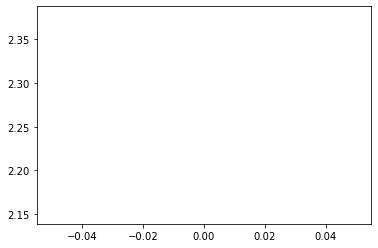

In [61]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))
    
plt.plot(loss_epoch_arr)
plt.show()

In [63]:
# Saving the model
model_dir = 'saved_models/'
model_name = 'vgg_net_cifar.pt'


torch.save(vgg.state_dict(), model_dir+model_name)

In [ ]:
# instantiate your Net
net = Net()

# load the net parameters by name
net.load_state_dict(torch.load('saved_models/fashion_net_ex.pt'))

print(net)